In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
data = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\Airlines_Data.xlsx")

# EDA

In [3]:
data.shape

(96, 2)

In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [7]:
# Check null values
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

# Visulization

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

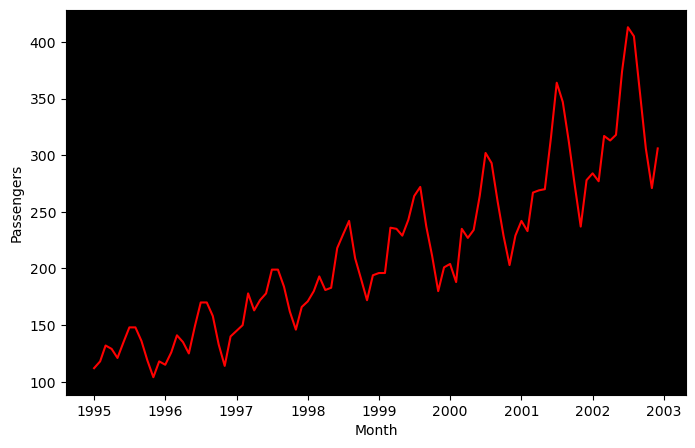

In [8]:
# Line Plot of passengers data
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("black")
sns.lineplot(x = "Month",y = "Passengers", data = data, color = "red")

<AxesSubplot:>

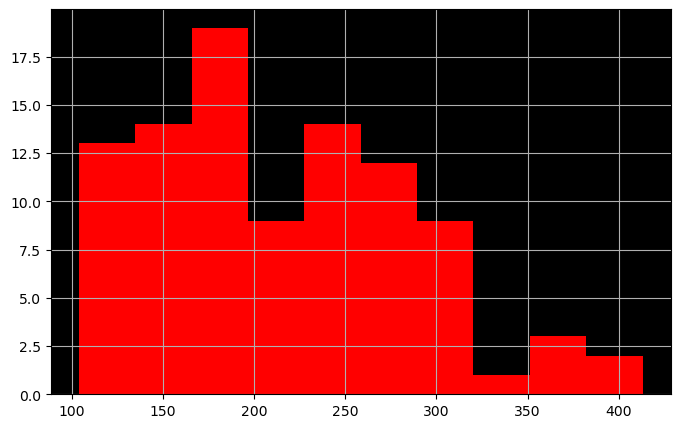

In [9]:
# Histogram
ax = plt.axes()
ax.set_facecolor("black")
data['Passengers'].hist(figsize=(8,5), color = 'red')

<AxesSubplot:ylabel='Density'>

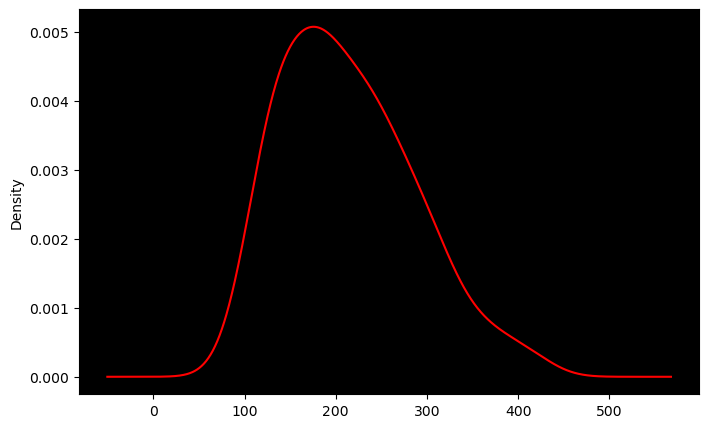

In [10]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("black")
data['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

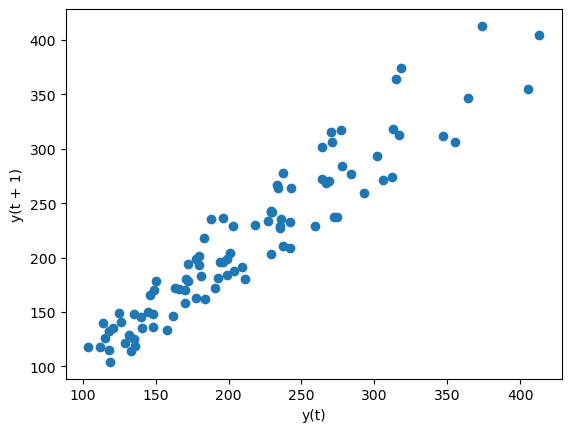

In [11]:
# Lagplot
from pandas.plotting import lag_plot

lag_plot(data['Passengers'])
plt.show()

# Preprocessing Model

In [12]:
# Import Libraries
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Data preprocessing for models
data1 = data.copy()
data1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
# Splitting data into Train and Test (77/33)
Train = data1.head(84)
Test = data1.tail(12)

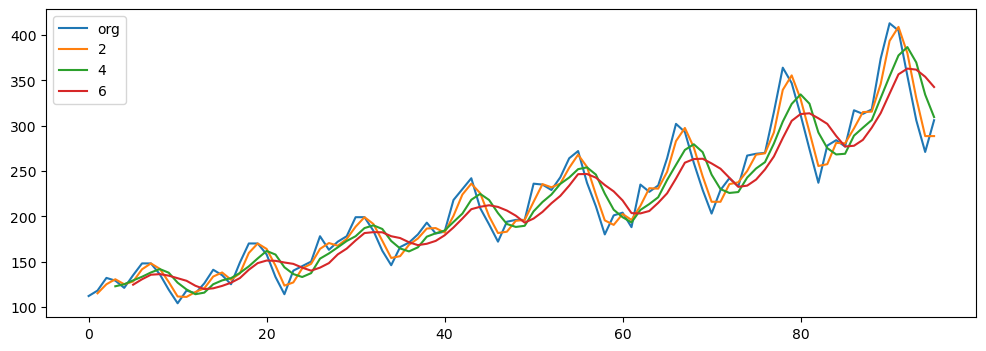

In [15]:
plt.figure(figsize=(12,4))
data1.Passengers.plot(label="org")
for i in range(2,8,2):
    data1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

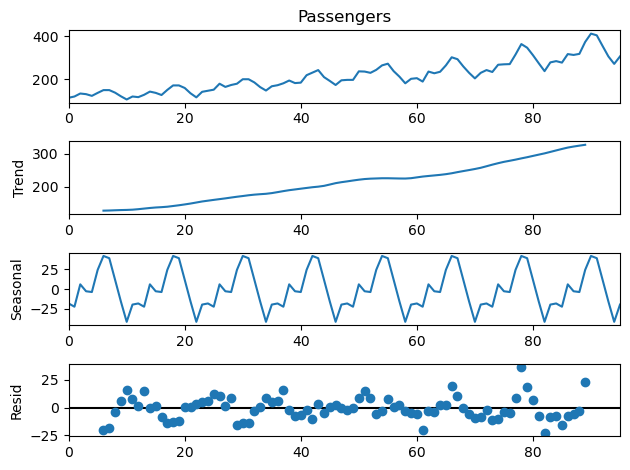

In [16]:
decompose_ts_add = seasonal_decompose(data1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [17]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [18]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

68.00674031349585

In [19]:
hw_model = Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

58.57776020000329

In [20]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers, pred_hwe_add_add)
rmse_hwe_add_add_model

63.14440376379176

In [21]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.7248143801876

In [22]:
data = {"MODEL":pd.Series(["rmse_ses_model","rmse_hw_model","rmse_hwe_add_add_model","rmse_hwe_model_mul_add_model"]),"RMSE_Values":pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_hw_model,58.577760
2,rmse_hwe_add_add_model,63.144404
3,rmse_hwe_model_mul_add_model,64.724814
0,rmse_ses_model,68.006740


# Model

In [23]:
# Data preprocessing for models
data2 = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\Airlines_Data.xlsx",header=0,index_col=0, parse_dates=True)
data2.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [24]:
data2["t"] = np.arange(1,97)
data2["t_squared"] = data2["t"]*data2["t"]
data2["sales_log"] = np.log(data2["Passengers"])
data2.head()

,Passengers,t,t_squared,sales_log
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


In [25]:
# Splitting data into Train and Test (77/33)
Train = data2.head(84)
Test = data2.tail(12)

In [26]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

53.19923653480271

In [27]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

48.05188897933164

In [28]:
Exp = smf.ols('sales_log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

46.05736110315635

In [29]:
data = {"MODEL":pd.Series(["rmse_linear_model","rmse_Exp_model","rmse_Quad_model"]),"RMSE_Values":pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp_model,46.057361
2,rmse_Quad_model,48.051889
0,rmse_linear_model,53.199237


# ARIMA Model

In [30]:
data3 = pd.read_excel("C:\Local Disk (A);\Excelr\Assignment Excelr\\18 Forecasting\Airlines_Data.xlsx",header=0,index_col=0, parse_dates=True)
data3.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [31]:
# separate out a validation dataset
split_point = len(data3) - 12
dataset, validation = data3[0:split_point], data3[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 84, Validation 12


In [32]:
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

In [33]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [35]:
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [36]:
print(train.shape)
print(test.shape)

(60,)
(24,)


In [37]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [38]:
data = {"MODEL":pd.Series(["rmse_ses_model","rmse_hw_model","rmse_hwe_add_add_model","rmse_hwe_model_mul_add_model","rmse_linear_model","rmse_Exp_model","rmse_Quad_model","rmse_ARIMA"]),"RMSE_Values":pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,rmse_ARIMA,29.058131
5,rmse_Exp_model,46.057361
6,rmse_Quad_model,48.051889
4,rmse_linear_model,53.199237
1,rmse_hw_model,58.577760
2,rmse_hwe_add_add_model,63.144404
3,rmse_hwe_model_mul_add_model,64.724814
0,rmse_ses_model,68.006740
